<a href="https://colab.research.google.com/github/shuntarotobari/qmacro2nd/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

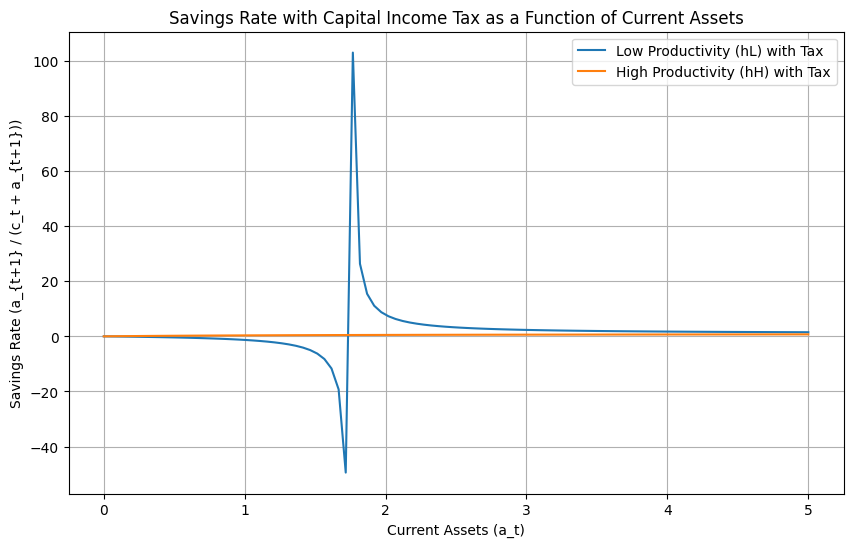

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


#describe the graph
def tauchen(n, mu, rho, sigma, m=3):
    z = np.zeros(n)
    z_prob = np.zeros((n, n))
    step = 2 * m * sigma / (n - 1)
    z[0] = mu - m * sigma
    for i in range(1, n):
        z[i] = z[i - 1] + step
    for i in range(n):
        for j in range(n):
            if j == 0:
                z_prob[i, j] = norm.cdf((z[0] - rho * z[i] + step / 2) / sigma)
            elif j == n - 1:
                z_prob[i, j] = 1 - norm.cdf((z[n - 1] - rho * z[i] - step / 2) / sigma)
            else:
                z_prob[i, j] = (norm.cdf((z[j] - rho * z[i] + step / 2) / sigma) -
                                norm.cdf((z[j] - rho * z[i] - step / 2) / sigma))
    return z, z_prob

# Parameters
rho = 0.6
sigma_e = 0.6
mu = 0
n = 2

# Discretize the process
h, P = tauchen(n, mu, rho, sigma_e)

# Parameters
beta = 0.98
sigma = 1.5
r = 0.04
w = 1
tau_k = 0.3

# Asset grid
a_min = 0
a_max = 5
a_points = 100
a_grid = np.linspace(a_min, a_max, a_points)

# Placeholder for savings rates
savings_rate_hL_tax = np.zeros(a_points)
savings_rate_hH_tax = np.zeros(a_points)

# Compute savings rate for each level of productivity with capital income tax
for i in range(a_points):
    c_hL_tax = w * h[0] + (1 + (1 - tau_k) * r) * a_grid[i] - a_grid[i]
    c_hH_tax = w * h[1] + (1 + (1 - tau_k) * r) * a_grid[i] - a_grid[i]
    savings_rate_hL_tax[i] = a_grid[i] / (c_hL_tax + a_grid[i])
    savings_rate_hH_tax[i] = a_grid[i] / (c_hH_tax + a_grid[i])

# Plot savings rates
plt.figure(figsize=(10, 6))
plt.plot(a_grid, savings_rate_hL_tax, label='Low Productivity (hL) with Tax')
plt.plot(a_grid, savings_rate_hH_tax, label='High Productivity (hH) with Tax')
plt.xlabel('Current Assets (a_t)')
plt.ylabel('Savings Rate (a_{t+1} / (c_t + a_{t+1}))')
plt.legend()
plt.title('Savings Rate with Capital Income Tax as a Function of Current Assets')
plt.grid(True)
plt.show()
